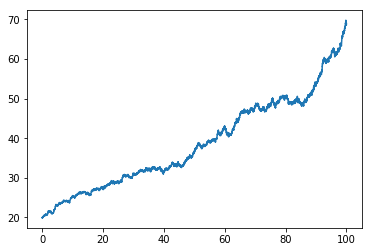

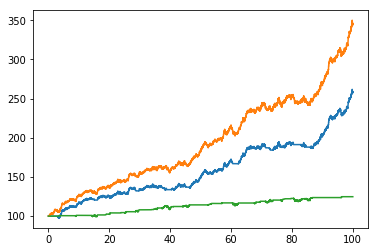

In [45]:
#SCENARIO 1

% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

T = 100
mu = 0.01
sigma = 0.02
S0 = 20
dt = 0.01
N = round(T/dt)
t = np.linspace(0, T, N)
W = np.random.standard_normal(size = N) 
W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
X = (mu-0.5*sigma**2)*t + sigma*W 
S = S0*np.exp(X) ### geometric brownian motion ###
plt.plot(t, S)
plt.show()


#TRADING: TREND FOLLOWING 
    
time_window = 3*int(1/dt)
cumsum = [0]

ma = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))

cash[0] = 100

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_ave = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_ave
    
    if ma[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[i] < x: 
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ma[i] > x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

ma[i+1] = S[len(S)-1]
        
tf_strategy = [a*b for a,b in zip(w,S)]+ cash

    
#TRADING: MEAN REVERSION 
    
time_window = 3*int(1/dt)
cumsum = [0]

ma = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))

cash[0] = 100

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_ave = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_ave
    
    if ma[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[i] > x: 
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ma[i] < x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

ma[i+1] = S[len(S)-1]

mr_strategy = [a*b for a,b in zip(w,S)]+ cash


plt.plot(t, tf_strategy)
plt.plot(t, cash[0]*S/S[0])
plt.plot(t, mr_strategy)
plt.show()

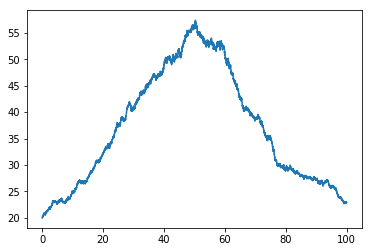

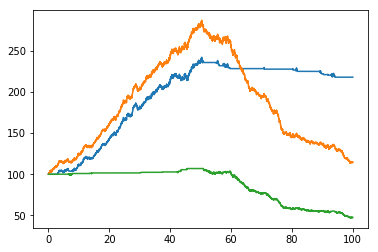

In [46]:
#SCENARIO 2 

Th = 50
mu = 0.02
sigma = 0.02
S0 = 20
dt = 0.01
N = round(Th/dt)
t = np.linspace(0, Th, N)
W = np.random.standard_normal(size = N) 
W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
X = (mu-0.5*sigma**2)*t + sigma*W 
S1 = S0*np.exp(X) ### geometric brownian motion ###

Th = 50
mu = -0.02
sigma = 0.02
S0 = 20
dt = 0.01
N = round(Th/dt)
t = np.linspace(0, Th, N)
W = np.random.standard_normal(size = N) 
W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
X = (mu-0.5*sigma**2)*t + sigma*W 
S2 = S1[-1]*np.exp(X) ### geometric brownian motion ###

T = 2*Th
N = round(T/dt)
t = np.linspace(0, T, N)
S = np.concatenate((S1,S2),axis=0)

plt.plot(t, S)
plt.show()


#TRADING: TREND FOLLOWING 
    
time_window = 3*int(1/dt)
cumsum = [0]

ma = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))

cash[0] = 100

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_ave = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_ave
    
    if ma[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[i] < x: 
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ma[i] > x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

ma[i+1] = S[len(S)-1]
        
tf_strategy = [a*b for a,b in zip(w,S)]+ cash

    
#TRADING: MEAN REVERSION 
    
time_window = 3*int(1/dt)
cumsum = [0]

ma = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))

cash[0] = 100

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_ave = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_ave
    
    if ma[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[i] > x: 
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ma[i] < x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

ma[i+1] = S[len(S)-1]

mr_strategy = [a*b for a,b in zip(w,S)]+ cash


plt.plot(t, tf_strategy)
plt.plot(t, cash[0]*S/S[0])
plt.plot(t, mr_strategy)
plt.show()

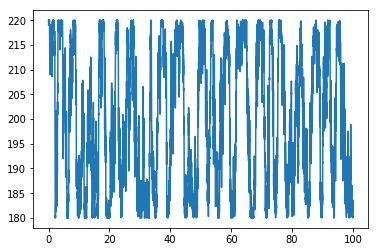

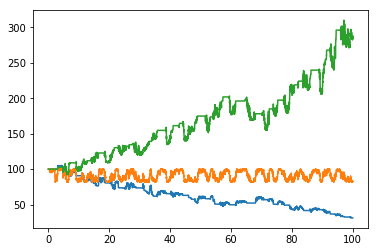

In [47]:

#SCENARIO 3

% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

T = 100
mu = 0.01
f = 20
sigma = 0.01
S0 = 20
dt = 0.01
N = round(T/dt)
t = np.linspace(0, T, N)
W = np.random.standard_normal(size = N) 
W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
X = mu*t + sigma*W 
S = S0*(10+np.cos(2*math.pi*f*X)) ### oscillatory motion ###
plt.plot(t, S)
plt.show()


#TRADING: TREND FOLLOWING 
    
time_window = 3*int(1/dt)
cumsum = [0]

ma = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))

cash[0] = 100

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_ave = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_ave
    
    if ma[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[i] < x: 
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ma[i] > x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

ma[i+1] = S[len(S)-1]
        
tf_strategy = [a*b for a,b in zip(w,S)]+ cash


    
#TRADING: MEAN REVERSION 
    
time_window = 3*int(1/dt)
cumsum = [0]

ma = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))
cash[0] = 100

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_ave = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_ave
    
    if ma[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[i] > x: 
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ma[i] < x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

ma[i+1] = S[len(S)-1]

mr_strategy = [a*b for a,b in zip(w,S)]+ cash


plt.plot(t, tf_strategy)
plt.plot(t, cash[0]*S/S[0])
plt.plot(t, mr_strategy)
plt.show()